In [1]:
#	EDA process, 
#	Data Cleaning,
#	Feature Selection
#	Dealing with Duplicates


In [2]:
#Importing libraries

import pandas as pd
import numpy as np


In [3]:
#Importing the file

df=pd.read_csv("Salary_Survey.csv")

In [4]:
#Checking the shape of the file; how many observations and features to have an idea of the size of it.

df.shape

(28178, 23)

In [5]:
#Checking the first 5 observations and the features

df.head()

,Timestamp,How old are you?,What industry do you work in?,Job title,"If your job title needs additional context, please clarify here:","What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)","How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.",Please indicate the currency,"If ""Other,"" please indicate the currency here:","If your income needs additional context, please provide it here:",...,How many years of professional work experience do you have overall?,How many years of professional work experience do you have in your field?,What is your highest level of education completed?,What is your gender?,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,"55,000",0.0,USD,NaN,NaN,...,5-7 years,5-7 years,Master's degree,Woman,NaN,NaN,NaN,NaN,NaN,NaN
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,"54,600",4000.0,GBP,NaN,NaN,...,8 - 10 years,5-7 years,College degree,Non-binary,NaN,NaN,NaN,NaN,NaN,NaN
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,"34,000",NaN,USD,NaN,NaN,...,2 - 4 years,2 - 4 years,College degree,Woman,NaN,NaN,NaN,NaN,NaN,NaN
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,"62,000",3000.0,USD,NaN,NaN,...,8 - 10 years,5-7 years,College degree,Woman,NaN,NaN,NaN,NaN,NaN,NaN
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,"60,000",7000.0,USD,NaN,NaN,...,8 - 10 years,5-7 years,College degree,Woman,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#Describe function to check the overview of the numerical values.

df.describe()

,"How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.",Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
count,2.078000e+04,0.0,0.0,0.0,0.0,0.0,0.0
mean,1.815342e+04,NaN,NaN,NaN,NaN,NaN,NaN
std,8.337722e+05,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN
50%,2.000000e+03,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN
max,1.200000e+08,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#Ckecking missing values

df.isnull().sum()

Timestamp                                                                                                                                                                                                                                  93
How old are you?                                                                                                                                                                                                                           93
What industry do you work in?                                                                                                                                                                                                             167
Job title                                                                                                                                                                                                                                  94
If your job title needs additional context, plea

In [8]:
#Marking corrupt values as missing

missing_values=["n.a.","?","NA","n/a", "na", "--"]
df = pd.read_csv("Salary_Survey.csv",na_values = missing_values)

In [9]:
#Checking missing values again to check if there was any difference made

df.isnull().sum()

Timestamp                                                                                                                                                                                                                                  93
How old are you?                                                                                                                                                                                                                           93
What industry do you work in?                                                                                                                                                                                                             167
Job title                                                                                                                                                                                                                                  95
If your job title needs additional context, plea

In [10]:
#The features titles are long so I will double check the names to see any hidden characters on it.
    
print(df.columns)

Index(['Timestamp', 'How old are you?', 'What industry do you work in?',
       'Job title',
       'If your job title needs additional context, please clarify here:',
       'What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)',
       'How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.',
       'Please indicate the currency',
       'If "Other," please indicate the currency here: ',
       'If your income needs additional context, please provide it here:',
       'What country do you work in?',
       'If you're in the U.S., what state do you work in?',
       'What city do you work in?',
       'How many years of professional work experience do you have overall?',
       

In [11]:
#Rename the features to make the data easier to read and work with.

df=df.rename(columns={"How old are you?":"Age",'Job title':"Job_title","What industry do you work in?":"Industry",'If your job title needs additional context, please clarify here:':"Job_title_context","What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)":"Annual_Salary",'How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.':"Monetary_Compensation","Please indicate the currency":"Currency",'If "Other," please indicate the currency here: ':"Other_currencies",'If your income needs additional context, please provide it here:':"Income_context", 'What country do you work in?':"Country_of_work","If you're in the U.S., what state do you work in?":"US_State",'What city do you work in?':"City_of_work","How many years of professional work experience do you have overall?":"Overral_experience",'How many years of professional work experience do you have in your field?':"Field_experience",'What is your highest level of education completed?':"Education",'What is your gender?':"Gender"})

In [12]:
#Check which features are categorical and numerical.

df.dtypes

#Only Monetary_Compensation and Unnamed 17, 18, 19, 20, 21, and 22 came as numerical and decimal as "float64" 
#Other variables would make sense being numerical like Age, and Salary which could indicate corruption.

Timestamp                 object
Age                       object
Industry                  object
Job_title                 object
Job_title_context         object
Annual_Salary             object
Monetary_Compensation    float64
Currency                  object
Other_currencies          object
Income_context            object
Country_of_work           object
US_State                  object
City_of_work              object
Overral_experience        object
Field_experience          object
Education                 object
Gender                    object
Unnamed: 17              float64
Unnamed: 18              float64
Unnamed: 19              float64
Unnamed: 20              float64
Unnamed: 21              float64
Unnamed: 22              float64
dtype: object

In [13]:
#Check the last five rows for overview.

df.tail()

,Timestamp,Age,Industry,Job_title,Job_title_context,Annual_Salary,Monetary_Compensation,Currency,Other_currencies,Income_context,...,Overral_experience,Field_experience,Education,Gender,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
28173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28174,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
#Drop empty columns

df.dropna(axis = 1, how ='all')

,Timestamp,Age,Industry,Job_title,Job_title_context,Annual_Salary,Monetary_Compensation,Currency,Other_currencies,Income_context,Country_of_work,US_State,City_of_work,Overral_experience,Field_experience,Education,Gender
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,"55,000",0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,"54,600",4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,"34,000",NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,"62,000",3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,"60,000",7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28174,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df

,Timestamp,Age,Industry,Job_title,Job_title_context,Annual_Salary,Monetary_Compensation,Currency,Other_currencies,Income_context,...,Overral_experience,Field_experience,Education,Gender,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,"55,000",0.0,USD,NaN,NaN,...,5-7 years,5-7 years,Master's degree,Woman,NaN,NaN,NaN,NaN,NaN,NaN
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,"54,600",4000.0,GBP,NaN,NaN,...,8 - 10 years,5-7 years,College degree,Non-binary,NaN,NaN,NaN,NaN,NaN,NaN
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,"34,000",NaN,USD,NaN,NaN,...,2 - 4 years,2 - 4 years,College degree,Woman,NaN,NaN,NaN,NaN,NaN,NaN
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,"62,000",3000.0,USD,NaN,NaN,...,8 - 10 years,5-7 years,College degree,Woman,NaN,NaN,NaN,NaN,NaN,NaN
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,"60,000",7000.0,USD,NaN,NaN,...,8 - 10 years,5-7 years,College degree,Woman,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28174,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
#Drop the rows with all NaN values

df = df.dropna(axis = 0, how ='all')

In [17]:
#Confirming that some rows where dropped

df.shape

(28085, 23)

In [18]:
#Overview

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28085 entries, 0 to 28084
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              28085 non-null  object 
 1   Age                    28085 non-null  object 
 2   Industry               28011 non-null  object 
 3   Job_title              28083 non-null  object 
 4   Job_title_context      7266 non-null   object 
 5   Annual_Salary          28085 non-null  object 
 6   Monetary_Compensation  20780 non-null  float64
 7   Currency               28085 non-null  object 
 8   Other_currencies       206 non-null    object 
 9   Income_context         3043 non-null   object 
 10  Country_of_work        28084 non-null  object 
 11  US_State               23059 non-null  object 
 12  City_of_work           27994 non-null  object 
 13  Overral_experience     28085 non-null  object 
 14  Field_experience       28085 non-null  object 
 15  Educati

In [19]:
df.tail()

,Timestamp,Age,Industry,Job_title,Job_title_context,Annual_Salary,Monetary_Compensation,Currency,Other_currencies,Income_context,...,Overral_experience,Field_experience,Education,Gender,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
28080,9/25/2024 19:54:18,45-54,"Accounting, Banking & Finance",Product Manager Lead,NaN,117000,8000.0,USD,NaN,NaN,...,11 - 20 years,11 - 20 years,College degree,Woman,NaN,NaN,NaN,NaN,NaN,NaN
28081,9/25/2024 21:34:43,45-54,Education (Primary/Secondary),Curriculum Writer,I am a freelance contract curriculum writer fo...,70000,0.0,USD,NaN,NaN,...,21 - 30 years,21 - 30 years,Master's degree,Woman,NaN,NaN,NaN,NaN,NaN,NaN
28082,9/30/2024 10:52:30,55-64,Government and Public Administration,Clerical Officer,NaN,28600,NaN,EUR,NaN,NaN,...,21 - 30 years,1 year or less,"Professional degree (MD, JD, etc.)",Man,NaN,NaN,NaN,NaN,NaN,NaN
28083,10/4/2024 13:05:24,18-24,Computing or Tech,Software Engineering Co-Op,I was an Intern,56160,0.0,USD,NaN,NaN,...,1 year or less,1 year or less,College degree,Man,NaN,NaN,NaN,NaN,NaN,NaN
28084,10/7/2024 5:17:56,65 or over,Social networks,Content creator,NaN,2000000,NaN,USD,NaN,NaN,...,41 years or more,2 - 4 years,PhD,Non-binary,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
#Change nan values on salary and monetary compensation do 0

df_salary_compensation= df[['Annual_Salary','Monetary_Compensation']].fillna(value=0)
df_salary_compensation

#https://www.statology.org/fillna-multiple-columns-pandas/

,Annual_Salary,Monetary_Compensation
0,"55,000",0.0
1,"54,600",4000.0
2,"34,000",0.0
3,"62,000",3000.0
4,"60,000",7000.0
...,...,...
28080,117000,8000.0
28081,70000,0.0
28082,28600,0.0
28083,56160,0.0


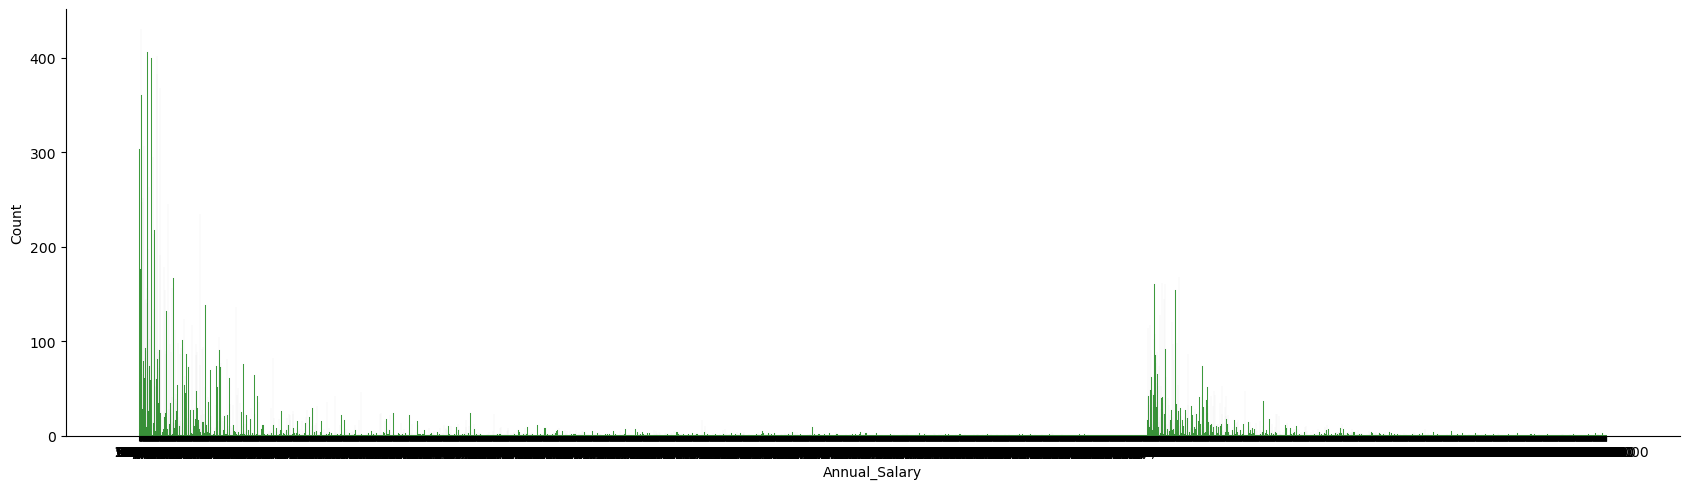

In [53]:
sns.displot(data=df, x="Annual_Salary", bins = 20 ,color="green",aspect=3.4);

In [21]:
#Checking for unique values on the features so we can identify inconsistencies and standardize

df['Annual_Salary'].unique()
#change <18, 65>

array(['55,000', '54,600', '34,000', ..., '7000', '37741', '53060'],
      dtype=object)

In [22]:
#Checking for unique values on the features so we can identify inconsistencies and standardize

df['Monetary_Compensation'].unique()
#change <18, 65>

array([0.00000e+00, 4.00000e+03,         nan, 3.00000e+03, 7.00000e+03,
       2.00000e+03, 1.00000e+04, 5.00000e+02, 5.00000e+03, 1.00000e+03,
       1.50000e+04, 1.00000e+02, 5.00000e+04, 6.00000e+03, 2.00000e+04,
       1.50000e+03, 2.50000e+03, 4.00000e+04, 2.50000e+04, 8.40000e+03,
       3.60000e+03, 1.30000e+04, 8.50000e+03, 6.00000e+04, 8.00000e+03,
       3.05000e+02, 1.60830e+04, 1.50000e+02, 3.00000e+04, 9.00000e+03,
       7.50000e+03, 1.87500e+04, 1.20000e+04, 1.40000e+03, 5.50000e+04,
       1.40000e+04, 1.75500e+04, 2.40000e+03, 1.89000e+05, 3.50000e+03,
       5.75000e+03, 2.70000e+03, 1.30000e+05, 3.10000e+04, 2.00000e+02,
       8.80000e+03, 1.75000e+05, 2.30000e+03, 1.60000e+04, 3.50000e+04,
       3.14050e+04, 8.00000e+04, 7.00000e+04, 2.80000e+04, 3.40000e+04,
       1.80000e+04, 1.17000e+04, 8.00000e+02, 4.00000e+02, 9.00000e+02,
       1.32180e+04, 6.50000e+03, 7.20000e+02, 1.78500e+04, 8.55000e+03,
       5.25000e+03, 1.20000e+03, 2.23000e+05, 1.00000e+05, 5.200

In [23]:
df.head()

,Timestamp,Age,Industry,Job_title,Job_title_context,Annual_Salary,Monetary_Compensation,Currency,Other_currencies,Income_context,...,Overral_experience,Field_experience,Education,Gender,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,"55,000",0.0,USD,NaN,NaN,...,5-7 years,5-7 years,Master's degree,Woman,NaN,NaN,NaN,NaN,NaN,NaN
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,"54,600",4000.0,GBP,NaN,NaN,...,8 - 10 years,5-7 years,College degree,Non-binary,NaN,NaN,NaN,NaN,NaN,NaN
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,"34,000",NaN,USD,NaN,NaN,...,2 - 4 years,2 - 4 years,College degree,Woman,NaN,NaN,NaN,NaN,NaN,NaN
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,"62,000",3000.0,USD,NaN,NaN,...,8 - 10 years,5-7 years,College degree,Woman,NaN,NaN,NaN,NaN,NaN,NaN
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,"60,000",7000.0,USD,NaN,NaN,...,8 - 10 years,5-7 years,College degree,Woman,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
#Checking for malformed values on the observations so we can identify inconsistencies and standardize

df['Age'].unique()
#change <18, 65>

array(['25-34', '45-54', '35-44', '18-24', '65 or over', '55-64',
       'under 18'], dtype=object)

In [25]:
df['Industry'].unique()

#' ...' means corrupt value or just that that is other values like etc?

array(['Education (Higher Education)', 'Computing or Tech',
       'Accounting, Banking & Finance', ..., 'Student ', 'Wine & Spirits',
       'Social networks'], dtype=object)

In [26]:
df['Job_title'].unique()


array(['Research and Instruction Librarian',
       'Change & Internal Communications Manager', 'Marketing Specialist',
       ..., 'Curriculum Writer', 'Software Engineering Co-Op',
       'Content creator'], dtype=object)

In [27]:
df['Currency'].unique()


array(['USD', 'GBP', 'CAD', 'EUR', 'AUD/NZD', 'Other', 'CHF', 'ZAR',
       'SEK', 'HKD', 'JPY'], dtype=object)

In [28]:
df['Other_currencies'].unique()
#need to fix and maybe merging with currency column

array([nan, 'INR', 'Peso Argentino', '$76,302.34',
       'My bonus is based on performance up to 10% of salary',
       'I work for an online state university, managing admissions data. Not direct tech support. ',
       '0', 'MYR', 'CHF', 'KWD', 'NOK', 'Na ', 'USD', 'BR$', 'SEK',
       'Base plus Commission ', 'canadian', 'Dkk', 'EUR', 'COP', 'TTD',
       'Indian rupees', 'BRL (R$)', 'Mexican pesos', 'CZK', 'GBP', 'DKK',
       'Bdt', 'RSU / equity', 'ZAR', 'Additonal = Bonus plus stock',
       'American Dollars', 'Php', 'PLN (Polish zloty)',
       'Overtime (about 5 hours a week) and bonus', 'czech crowns',
       'Stock ', 'TRY', 'Norwegian kroner (NOK)', 'CNY', 'ILS/NIS',
       '55,000', 'AUD & NZD are not the same currency...', 'US Dollar',
       'Canadian ', 'AUD', 'BRL', 'NIS (new Israeli shekel)', '-',
       'RMB (chinese yuan)', 'Taiwanese dollars',
       "AUD and NZD aren't the same currency, and have absolutely nothing to do with each other :(",
       'NZD', 'Phili

In [29]:
df['Income_context'].unique()


array([nan, 'I work for a Charter School', 'Commission based', ..., 'ff',
       '10% of the salary if te goals are met', 'I recieve tips'],
      dtype=object)

In [30]:
df['Country_of_work'].unique()
#need to fix

array(['United States', 'United Kingdom', 'US', 'USA', 'Canada',
       'United Kingdom ', 'usa', 'UK', 'Scotland ', 'U.S.',
       'United States ', 'The Netherlands', 'Australia ', 'Spain', 'us',
       'Usa', 'England', 'finland', 'United States of America', 'France',
       'United states', 'Scotland', 'USA ', 'United states ', 'Germany',
       'UK ', 'united states', 'Ireland', 'India', 'Australia', 'Uk',
       'United States of America ', 'U.S. ', 'canada', 'Canada ', 'U.S>',
       'ISA', 'Argentina', 'Great Britain ', 'US ', 'United State',
       'U.S.A', 'Denmark', 'U.S.A.', 'America', 'Netherlands',
       'netherlands', 'England ', 'united states of america', 'Ireland ',
       'Switzerland', 'Netherlands ', 'Bermuda', 'Us',
       'The United States', 'United State of America', 'Germany ',
       'Malaysia', 'Mexico ', 'United Stated', 'South Africa ', 'Belgium',
       'Northern Ireland', 'u.s.', 'South Africa', 'UNITED STATES',
       'united States', 'Sweden', 'Hong K

In [31]:
df['US_State'].unique()
#need to fix

array(['Massachusetts', nan, 'Tennessee', 'Wisconsin', 'South Carolina',
       'New Hampshire', 'Arizona', 'Missouri', 'Florida', 'Pennsylvania',
       'Michigan', 'Minnesota', 'Illinois', 'California', 'Georgia',
       'Ohio', 'District of Columbia', 'Maryland', 'Texas', 'Virginia',
       'North Carolina', 'New York', 'New Jersey', 'Rhode Island',
       'Colorado', 'Oregon', 'Washington', 'Indiana', 'Iowa', 'Nebraska',
       'Oklahoma', 'Maine', 'Connecticut', 'South Dakota',
       'West Virginia', 'Idaho', 'Louisiana', 'Montana', 'Kentucky',
       'North Dakota', 'Kansas', 'Vermont', 'Arkansas', 'Alabama',
       'Nevada', 'Delaware', 'New Mexico', 'Hawaii', 'Utah',
       'Mississippi', 'Kentucky, Ohio', 'District of Columbia, Virginia',
       'District of Columbia, Maryland', 'Alaska', 'Arizona, Washington',
       'Georgia, New York', 'California, Colorado', 'California, Oregon',
       'District of Columbia, Maryland, Pennsylvania, Virginia',
       'Arizona, California'

In [32]:
df['City_of_work'].unique()


array(['Boston', 'Cambridge', 'Chattanooga', ..., 'Shenzhen',
       'Bennettsville', 'Jhonston'], dtype=object)

In [33]:
df['Overral_experience'].unique()
#drop years, <1 and 41>

array(['5-7 years', '8 - 10 years', '2 - 4 years', '21 - 30 years',
       '11 - 20 years', '1 year or less', '41 years or more',
       '31 - 40 years'], dtype=object)

In [34]:
df['Field_experience'].unique()
#drop years, <1 and 41>

array(['5-7 years', '2 - 4 years', '21 - 30 years', '11 - 20 years',
       '1 year or less', '8 - 10 years', '31 - 40 years',
       '41 years or more'], dtype=object)

In [35]:
df['Education'].unique()
#need to fix : college degree/high school

array(["Master's degree", 'College degree', 'PhD', nan, 'Some college',
       'High School', 'Professional degree (MD, JD, etc.)'], dtype=object)

In [36]:
df['Gender'].unique()
#need to fix

array(['Woman', 'Non-binary', 'Man', nan, 'Other or prefer not to answer',
       'Prefer not to answer'], dtype=object)

In [37]:
#Checking how many null values there are.

#df.isnull().sum()

In [38]:
#df.head()

In [39]:
#Check some information about the numerical data we have

#df.describe()

#It was founded corrupt values for monetary compensation, and unnamed features are empty.

In [40]:
#Double checking shape to confirm the duplicates where removed.

#df.shape

In [41]:
df.shape

(28085, 23)

In [42]:
df.columns

Index(['Timestamp', 'Age', 'Industry', 'Job_title', 'Job_title_context',
       'Annual_Salary', 'Monetary_Compensation', 'Currency',
       'Other_currencies', 'Income_context', 'Country_of_work', 'US_State',
       'City_of_work', 'Overral_experience', 'Field_experience', 'Education',
       'Gender', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20',
       'Unnamed: 21', 'Unnamed: 22'],
      dtype='object')

In [43]:
df.isnull().sum()

Timestamp                    0
Age                          0
Industry                    74
Job_title                    2
Job_title_context        20819
Annual_Salary                0
Monetary_Compensation     7305
Currency                     0
Other_currencies         27879
Income_context           25042
Country_of_work              1
US_State                  5026
City_of_work                91
Overral_experience           0
Field_experience             0
Education                  222
Gender                     171
Unnamed: 17              28085
Unnamed: 18              28085
Unnamed: 19              28085
Unnamed: 20              28085
Unnamed: 21              28085
Unnamed: 22              28085
dtype: int64

In [44]:
#Suppres cientifix notation

#df["Annual_Salary"].describe().apply(lambda x: format(x, 'f'))

#it didnt work

In [45]:
import seaborn as sns

[Text(0.5, 0, 'Adm Spent'),
 Text(0, 0.5, 'Companies'),
 Text(0.5, 1.0, 'Administration Histogram')]

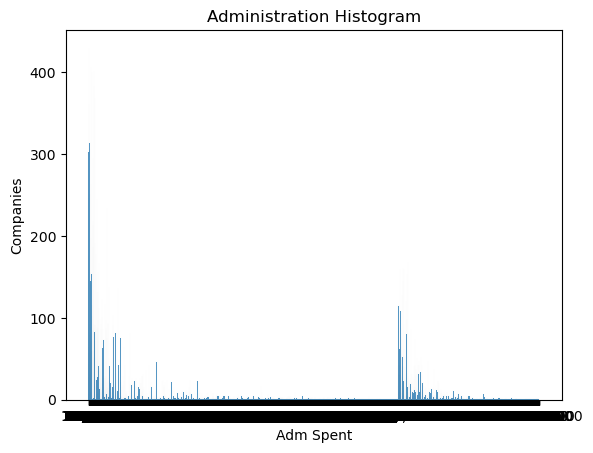

In [52]:
ax = sns.histplot(df.Annual_Salary)
ax.set(xlabel='Adm Spent', ylabel='Companies', title ='Administration Histogram')